In [ ]:
#import the dataset with parameter "as_frame" set to True to render the data in a Pandas dataframe format
data = load_iris(as_frame=True)

In [ ]:
iris_df = data["data"]

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#importing libraries

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import altair as alt
import numpy as np

In [ ]:
#Adding target variable to the dataframe
iris_df["target"] = data.target

In [ ]:
targets = data["target_names"]

#Casting target_names into the "target" columns for better representation and understanding
iris_df["target"] = iris_df["target"].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#before fitting PCA, we need to normalize the features (VERY IMPORTANT)
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df.drop(["target"], axis=1))

In [ ]:
iris_scaled[:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [ ]:
#initialize PCA with 2 components
pca = PCA(n_components=2)

In [ ]:
#fit PCA to the normalized features of the Iris dataset
pca.fit(iris_scaled)

PCA(n_components=2)

In [ ]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [ ]:
#Applying the transform so that we obtain the principal components
iris_pca = pca.transform(iris_scaled)

In [ ]:
#Creating a Dataframe based on the principal components
iris_pca_df = pd.DataFrame(data = iris_pca, columns = ['principal component 1', 'principal component 2'])

In [ ]:
iris_pca_df.head()

,principal component 1,principal component 2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [ ]:
#Attaching the target variable to this PCA Dataframe
iris_pca_df = pd.concat([iris_pca_df, iris_df[['target']]], axis = 1)

In [ ]:
iris_pca_df.head()

,principal component 1,principal component 2,target,kmeans_cluster_group,target
0,-2.264703,0.480027,setosa,1,setosa
1,-2.080961,-0.674134,setosa,1,setosa
2,-2.364229,-0.341908,setosa,1,setosa
3,-2.299384,-0.597395,setosa,1,setosa
4,-2.389842,0.646835,setosa,1,setosa


In [ ]:
alt.Chart(iris_pca_df).mark_point(size=60).encode(
    x='principal component 1',
    y='principal component 2',
    color=alt.Color('target:N', legend=alt.Legend(title="Species by color"), scale=alt.Scale(scheme='category10')),
    tooltip=['target']
).properties(
    title='Iris Data',
    width=700,
    height=500
).interactive()

alt.Chart(...)

In [ ]:
#Iterate from 2 clusters to 7 clusters and capture the scores of each loop.

km_scores= []
for i in range(2,8):
    km = KMeans(n_clusters=i, random_state=1301).fit(iris_scaled)
    preds = km.predict(iris_scaled)
    
    print(f'Score for number of cluster(s) {i}: {km.score(iris_scaled):.3f}')
    km_scores.append(-km.score(iris_scaled))
   
    print('-'*25)

Score for number of cluster(s) 2: -222.362
-------------------------
Score for number of cluster(s) 3: -139.825
-------------------------
Score for number of cluster(s) 4: -114.092
-------------------------
Score for number of cluster(s) 5: -90.928
-------------------------
Score for number of cluster(s) 6: -80.022
-------------------------
Score for number of cluster(s) 7: -70.764
-------------------------


In [ ]:
df_plot = pd.DataFrame({'Number of clusters':[i for i in range(2,8)],'kmean score': km_scores})

alt.Chart(df_plot).mark_line(point=True).encode(
    x=alt.X('Number of clusters:N', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('kmean score'),
    tooltip=[alt.Tooltip('kmean score', format='.2f')]
).properties(
    title='Kmean score ifo number of cluster'
).properties(
    title='The elbow method for determining number of clusters',
    width=400
)

alt.Chart(...)

In [ ]:
km = KMeans(n_clusters=3, random_state=1301).fit(iris_scaled)
km_preds = km.predict(iris_scaled)

In [ ]:
# Append the clustering groups to our PCA Dataframe, so that we can perform the next visualization 
# and we can see everything clearly side-by-side

iris_pca_df["kmeans_cluster_group"] = km_preds

In [ ]:
iris_pca_df.head()

,principal component 1,principal component 2,target,kmeans_cluster_group,target
0,-2.264703,0.480027,setosa,1,setosa
1,-2.080961,-0.674134,setosa,1,setosa
2,-2.364229,-0.341908,setosa,1,setosa
3,-2.299384,-0.597395,setosa,1,setosa
4,-2.389842,0.646835,setosa,1,setosa


In [ ]:
base = alt.Chart(iris_pca_df).mark_point(size=60, opacity=0.95).encode(
    x='principal component 1',
    y='principal component 2',
    color=alt.Color('target:N', legend=alt.Legend(title="Species by color"), scale=alt.Scale(scheme='rainbow')),
    tooltip=['target', 'kmeans_cluster_group']
).properties(
    title='Iris Data with Original Target Labels',
    width=400,
    height=300
).interactive()

base.encode(x='principal component 1', y='principal component 2') | base.encode(x='principal component 1', 
                                                                       y='principal component 2', 
                                                                       color=alt.Color('kmeans_cluster_group:N', 
                                                                                       legend=alt.Legend(title="Cluster Group"), 
                                                                                       scale=alt.Scale(scheme='tableau10'))).properties(title='Iris Data with KMeans Cluster Groups')

alt.HConcatChart(...)

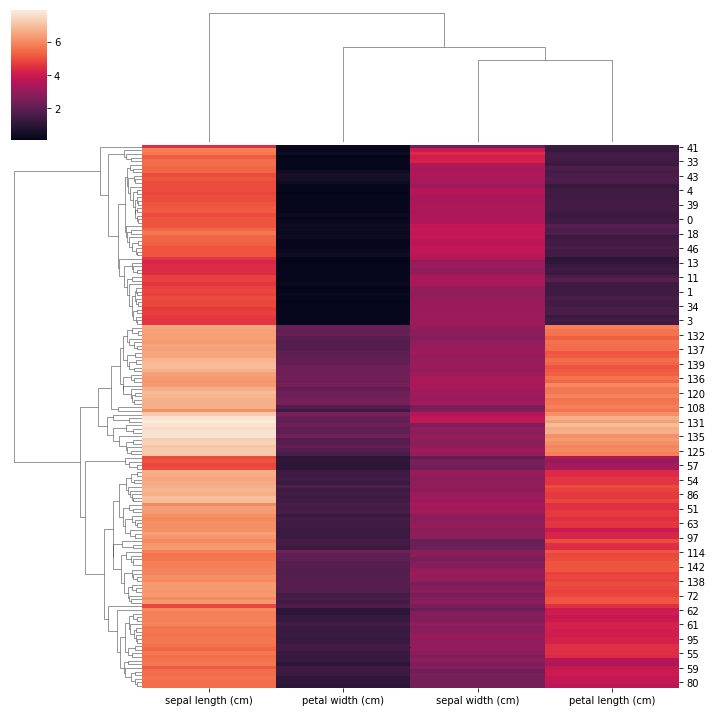

In [ ]:
pure_iris = iris_df.drop(["target"], axis=1)
g = sns.clustermap(pure_iris)

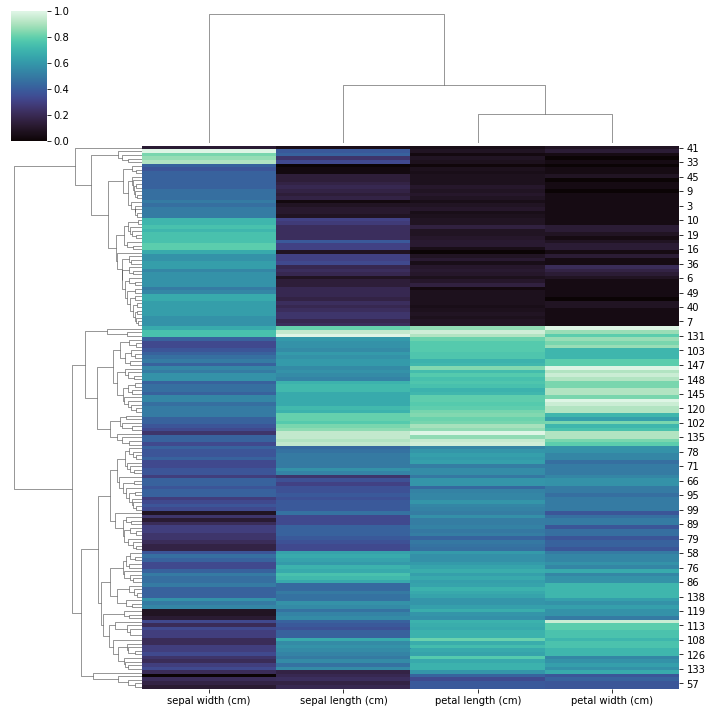

In [ ]:
# Changing the color to keep it interesting
# Here is the Dendogram after standardizing the dataset

g = sns.clustermap(pure_iris, standard_scale=1, cmap="mako")

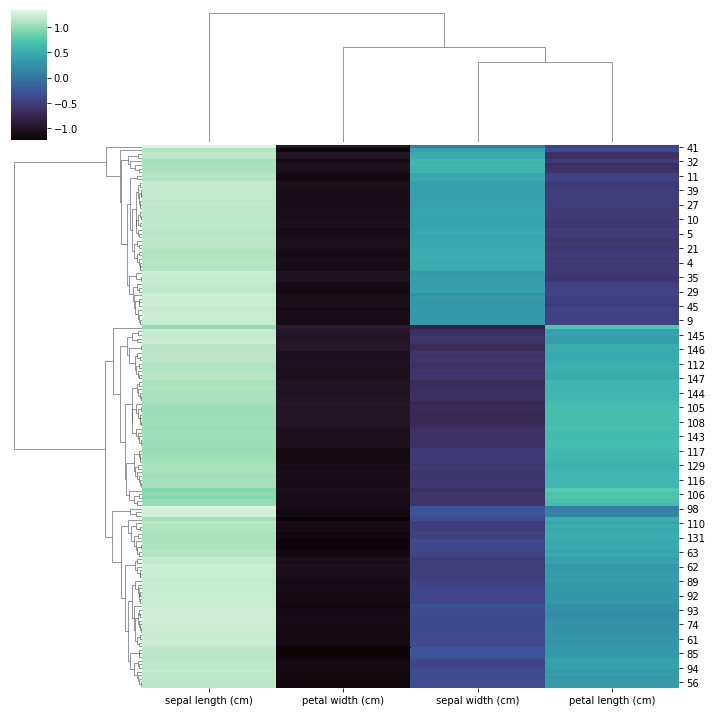

In [ ]:
# Here is the Dendrogram after normalizing the dataset

g = sns.clustermap(pure_iris, z_score=0, cmap="mako")